# Adventure Sales Data 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from matplotlib import figure
%matplotlib inline

In [6]:
import plotly.graph_objs as go
import plotly.express as px

In [35]:
try:
    import pycountry
    print("pycountry is installed.")
except ModuleNotFoundError:
    print("pycountry is not installed.")



pycountry is installed.


In [36]:
import pycountry

In [7]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [8]:
df1 = pd.read_csv("C:\\Users\\USER-PC\\Downloads\\AdventureWorks+Raw+Data\\AdventureWorks Raw Data\\AdventureWorks Sales Data 2020.csv")

In [9]:
df2 = pd.read_csv("C:\\Users\\USER-PC\\Downloads\\AdventureWorks+Raw+Data\\AdventureWorks Raw Data\\AdventureWorks Sales Data 2021.csv")

In [10]:
df3 = pd.read_csv("C:\\Users\\USER-PC\\Downloads\\AdventureWorks+Raw+Data\\AdventureWorks Raw Data\\AdventureWorks Sales Data 2022.csv")

In [11]:
calender_lu = pd.read_csv("C:\\Users\\USER-PC\\Downloads\\AdventureWorks+Raw+Data\\AdventureWorks Raw Data\\AdventureWorks Calendar Lookup.csv")

In [12]:
customer_lu = pd.read_csv("C:\\Users\\USER-PC\\Downloads\\AdventureWorks+Raw+Data\\AdventureWorks Raw Data\\AdventureWorks Customer Lookup.csv", encoding = "latin-1")

In [13]:
productCategory_lu = pd.read_csv("C:\\Users\\USER-PC\\Downloads\\AdventureWorks+Raw+Data\\AdventureWorks Raw Data\\AdventureWorks Product Categories Lookup.csv", encoding = "latin-1")

In [14]:
product_lu = pd.read_csv("C:\\Users\\USER-PC\\Downloads\\AdventureWorks+Raw+Data\\AdventureWorks Raw Data\\AdventureWorks Product Lookup.csv")

In [15]:
productSubCategory_lu = pd.read_csv("C:\\Users\\USER-PC\\Downloads\\AdventureWorks+Raw+Data\\AdventureWorks Raw Data\\AdventureWorks Product Subcategories Lookup.csv")

In [16]:
return_data = pd.read_csv("C:\\Users\\USER-PC\\Downloads\\AdventureWorks+Raw+Data\\AdventureWorks Raw Data\\AdventureWorks Returns Data.csv")

In [17]:
territory_lu = pd.read_csv("C:\\Users\\USER-PC\\Downloads\\AdventureWorks+Raw+Data\\AdventureWorks Raw Data\\AdventureWorks Territory Lookup.csv")

In [18]:
territory_lu["GDP_Capita"] = [81695.18707133047, 81695.18707133047, 81695.18707133047, 81695.18707133047, 81695.18707133047,  53371.697431970075,
                              44460.81784570091, 52745.75570641304,  64711.76560305661, 48866.603960029846]
# adding GDP_Capita for mapping

In [19]:
# concatenating th sales table

In [20]:
alldf = pd.concat([df1,df2,df3])

In [16]:
alldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56046 entries, 0 to 29480
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OrderDate      56046 non-null  object
 1   StockDate      56046 non-null  object
 2   OrderNumber    56046 non-null  object
 3   ProductKey     56046 non-null  int64 
 4   CustomerKey    56046 non-null  int64 
 5   TerritoryKey   56046 non-null  int64 
 6   OrderLineItem  56046 non-null  int64 
 7   OrderQuantity  56046 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 3.8+ MB


In [16]:
# exploring the customer data for possible merging

In [17]:
customer_lu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18151 entries, 0 to 18150
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerKey     18148 non-null  float64
 1   Prefix          18018 non-null  object 
 2   FirstName       18148 non-null  object 
 3   LastName        18148 non-null  object 
 4   BirthDate       18148 non-null  object 
 5   MaritalStatus   18148 non-null  object 
 6   Gender          18018 non-null  object 
 7   EmailAddress    18148 non-null  object 
 8   AnnualIncome    18148 non-null  float64
 9   TotalChildren   18148 non-null  float64
 10  EducationLevel  18148 non-null  object 
 11  Occupation      18148 non-null  object 
 12  HomeOwner       18148 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.8+ MB


In [18]:
customer_lu["CustomerKey"].unique()

array([11000., 11001., 11002., ..., 29482., 29483.,    nan])

In [19]:
#merging the sales table with customer table by customer key

In [21]:
sales_customer_lu = pd.merge(alldf, customer_lu, on ="CustomerKey", how = "inner")

In [21]:
sales_customer_lu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56046 entries, 0 to 56045
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderDate       56046 non-null  object 
 1   StockDate       56046 non-null  object 
 2   OrderNumber     56046 non-null  object 
 3   ProductKey      56046 non-null  int64  
 4   CustomerKey     56046 non-null  int64  
 5   TerritoryKey    56046 non-null  int64  
 6   OrderLineItem   56046 non-null  int64  
 7   OrderQuantity   56046 non-null  int64  
 8   Prefix          55666 non-null  object 
 9   FirstName       56046 non-null  object 
 10  LastName        56046 non-null  object 
 11  BirthDate       56046 non-null  object 
 12  MaritalStatus   56046 non-null  object 
 13  Gender          55666 non-null  object 
 14  EmailAddress    56046 non-null  object 
 15  AnnualIncome    56046 non-null  float64
 16  TotalChildren   56046 non-null  float64
 17  EducationLevel  56046 non-null 

In [20]:
productCategory_lu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ProductCategoryKey  4 non-null      int64 
 1   CategoryName        4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [ ]:
# exploring the productcategory, product, productSubCategory table for possible merging

In [21]:
productCategory_lu.head()

,ProductCategoryKey,CategoryName
0,1,Bikes
1,2,Components
2,3,Clothing
3,4,Accessories


In [24]:
product_lu.head(3)

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice
0,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,34.9900
1,215,31,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap...",Black,0,0,12.0278,33.6442
2,218,23,SO-B909-M,"Mountain Bike Socks, M",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,M,U,3.3963,9.5000


In [34]:
productSubCategory_lu.head(3)

,ProductSubcategoryKey,SubcategoryName,ProductCategoryKey
0,1,Mountain Bikes,1
1,2,Road Bikes,1
2,3,Touring Bikes,1


In [ ]:
# merging productcategory with product subcategory

In [22]:
productCategory_productSubCategory = pd.merge(productCategory_lu, productSubCategory_lu, on = "ProductCategoryKey", how = "inner")

In [30]:
productCategory_productSubCategory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ProductCategoryKey     37 non-null     int64 
 1   CategoryName           37 non-null     object
 2   ProductSubcategoryKey  37 non-null     int64 
 3   SubcategoryName        37 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.3+ KB


In [35]:
productCategory_productSubCategory.head(3)

,ProductCategoryKey,CategoryName,ProductSubcategoryKey,SubcategoryName
0,1,Bikes,1,Mountain Bikes
1,1,Bikes,2,Road Bikes
2,1,Bikes,3,Touring Bikes


In [ ]:
#merging product, subcategory, category by productsubcategorykey by productcategory key

In [23]:
product_productCategory_productSubCategory = pd.merge(product_lu, productCategory_productSubCategory, on = "ProductSubcategoryKey", how = "inner")

In [39]:
product_productCategory_productSubCategory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ProductKey             293 non-null    int64  
 1   ProductSubcategoryKey  293 non-null    int64  
 2   ProductSKU             293 non-null    object 
 3   ProductName            293 non-null    object 
 4   ModelName              293 non-null    object 
 5   ProductDescription     293 non-null    object 
 6   ProductColor           243 non-null    object 
 7   ProductSize            293 non-null    object 
 8   ProductStyle           293 non-null    object 
 9   ProductCost            293 non-null    float64
 10  ProductPrice           293 non-null    float64
 11  ProductCategoryKey     293 non-null    int64  
 12  CategoryName           293 non-null    object 
 13  SubcategoryName        293 non-null    object 
dtypes: float64(2), int64(3), object(9)
memory usage: 32.2+ KB


In [ ]:
#merging saless, product, subcategory, category by productsubcategorykey by product key

In [24]:
sales_customer_product_productCategory_productSubCategory = pd.merge(sales_customer_lu, product_productCategory_productSubCategory, on = "ProductKey", how = "inner")

In [105]:
sales_customer_product_productCategory_productSubCategory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56046 entries, 0 to 56045
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OrderDate              56046 non-null  object 
 1   StockDate              56046 non-null  object 
 2   OrderNumber            56046 non-null  object 
 3   ProductKey             56046 non-null  int64  
 4   CustomerKey            56046 non-null  int64  
 5   TerritoryKey           56046 non-null  int64  
 6   OrderLineItem          56046 non-null  int64  
 7   OrderQuantity          56046 non-null  int64  
 8   Prefix                 55666 non-null  object 
 9   FirstName              56046 non-null  object 
 10  LastName               56046 non-null  object 
 11  BirthDate              56046 non-null  object 
 12  MaritalStatus          56046 non-null  object 
 13  Gender                 55666 non-null  object 
 14  EmailAddress           56046 non-null  object 
 15  An

In [44]:
# exploring territory data for possible merging

In [46]:
territory_lu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SalesTerritoryKey  10 non-null     int64 
 1   Region             10 non-null     object
 2   Country            10 non-null     object
 3   Continent          10 non-null     object
dtypes: int64(1), object(3)
memory usage: 452.0+ bytes


In [150]:
territory_lu.head()

,SalesTerritoryKey,Region,Country,Continent,GDP_Capita
0,1,Northwest,United States,North America,81695.187071
1,2,Northeast,United States,North America,81695.187071
2,3,Central,United States,North America,81695.187071
3,4,Southwest,United States,North America,81695.187071
4,5,Southeast,United States,North America,81695.187071


In [54]:
# merging all the data together

In [25]:
all_data = pd.merge(sales_customer_product_productCategory_productSubCategory, territory_lu, left_on = "TerritoryKey", right_on = "SalesTerritoryKey", how = "inner")

In [26]:
returns = pd.merge(return_data, product_productCategory_productSubCategory, on = "ProductKey", how = "inner")

In [116]:
all_data.head(3)

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice,ProductCategoryKey,CategoryName,SubcategoryName,SalesTerritoryKey,Region,Country,Continent,GDP_Capita,Year,MonthNumber,Month,date,Start of Quater,Quater,ISO_Code,Revenue,COGS,Profit,IncomeGroup
0,2020-01-01,2019-09-21,SO45080,332,14657,1,1,1,MR.,JOHN,THOMAS,11/11/1958,M,M,john48@adventure-works.com,80000.0,1.0,Partial College,Skilled Manual,N,2,BK-R50B-58,"Road-650 Black, 58",Road-650,Value-priced bike with many features of our to...,Black,58,U,413.1463,699.0982,1,Bikes,Road Bikes,1,Northwest,United States,North America,81695.187071,2020,01,Jan,31 01 2020,Jan-2020,Q-1,USA,699.10,413.15,285.95,Average income
1,2020-01-01,2019-12-05,SO45079,312,29255,4,1,1,MR.,KYLE,WASHINGTON,4/11/1955,S,M,kyle8@adventure-works.com,80000.0,3.0,Partial College,Professional,N,2,BK-R93R-48,"Road-150 Red, 48",Road-150,This bike is ridden by race winners. Developed...,Red,48,U,2171.2942,3578.2700,1,Bikes,Road Bikes,4,Southwest,United States,North America,81695.187071,2020,01,Jan,31 01 2020,Jan-2020,Q-1,USA,3578.27,2171.29,1406.98,Average income
2,2020-01-01,2019-10-29,SO45082,350,11455,9,1,1,MR.,ROSS,SANZ,4/21/1974,M,M,ross38@adventure-works.com,100000.0,0.0,High School,Management,Y,1,BK-M82B-44,"Mountain-100 Black, 44",Mountain-100,Top-of-the-line competition mountain bike. Per...,Black,44,U,1898.0944,3374.9900,1,Bikes,Mountain Bikes,9,Australia,Australia,Pacific,64711.765603,2020,01,Jan,31 01 2020,Jan-2020,Q-1,AUS,3374.99,1898.09,1476.90,High income


In [167]:
returns.head(3)

,ReturnDate,TerritoryKey,ProductKey,ReturnQuantity,ProductSKU,ProductName,ProductPrice,CategoryName,SubcategoryName,Cost Returns,Start Of Quater
0,2020-01-18,9,312,1,BK-R93R-48,"Road-150 Red, 48",3578.27,Bikes,Road Bikes,3578.27,Jan-2020
1,2020-01-18,10,310,1,BK-R93R-62,"Road-150 Red, 62",3578.27,Bikes,Road Bikes,3578.27,Jan-2020
2,2020-01-21,8,346,1,BK-M82S-44,"Mountain-100 Silver, 44",3399.99,Bikes,Mountain Bikes,3399.99,Jan-2020


In [ ]:
# checking out the all merged data

In [82]:
all_data["OrderQuantity"].unique()

array([1, 2, 3])

In [73]:
all_data["Month"].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [74]:
all_data["Quater"].unique()

array(['Q-1', 'Q-2', 'Q-3', 'Q-4'], dtype=object)

In [59]:
all_data["SubcategoryName"].unique()

array(['Road Bikes', 'Mountain Bikes', 'Bottles and Cages',
       'Tires and Tubes', 'Bike Stands', 'Touring Bikes', 'Helmets',
       'Jerseys', 'Fenders', 'Caps', 'Gloves', 'Socks', 'Hydration Packs',
       'Vests', 'Cleaners', 'Bike Racks', 'Shorts'], dtype=object)

In [106]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56046 entries, 0 to 56045
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   OrderDate              56046 non-null  datetime64[ns]
 1   StockDate              56046 non-null  object        
 2   OrderNumber            56046 non-null  object        
 3   ProductKey             56046 non-null  int64         
 4   CustomerKey            56046 non-null  object        
 5   TerritoryKey           56046 non-null  int64         
 6   OrderLineItem          56046 non-null  int64         
 7   OrderQuantity          56046 non-null  int64         
 8   Prefix                 56046 non-null  object        
 9   FirstName              56046 non-null  object        
 10  LastName               56046 non-null  object        
 11  BirthDate              56046 non-null  object        
 12  MaritalStatus          56046 non-null  object        
 13  G

In [141]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ReturnDate             1809 non-null   object 
 1   TerritoryKey           1809 non-null   int64  
 2   ProductKey             1809 non-null   int64  
 3   ReturnQuantity         1809 non-null   int64  
 4   ProductSubcategoryKey  1809 non-null   int64  
 5   ProductSKU             1809 non-null   object 
 6   ProductName            1809 non-null   object 
 7   ModelName              1809 non-null   object 
 8   ProductCost            1809 non-null   float64
 9   ProductPrice           1809 non-null   float64
 10  ProductCategoryKey     1809 non-null   int64  
 11  CategoryName           1809 non-null   object 
 12  SubcategoryName        1809 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 183.9+ KB


# Data cleaning 

In [60]:
# adding require columns for the analysis

In [27]:
all_data["Year"] = all_data["OrderDate"].astype(str).str[:4]
# adding Year colunms

In [28]:
all_data["MonthNumber"] = all_data["OrderDate"].astype(str).str[5:7]

In [29]:
all_data["OrderDate"] = pd.to_datetime(all_data["OrderDate"])
all_data["Month"] = all_data["OrderDate"].dt.strftime("%b")
#adding month columnn

In [30]:
all_data["OrderDate"] = pd.to_datetime(all_data["OrderDate"])
all_data["date"] =all_data["OrderDate"] + pd.offsets.MonthEnd(0)
all_data["date"] = all_data["date"].dt.strftime("%d %m %Y")
#adding date columnn

In [31]:
all_data["OrderDate"] = pd.to_datetime(all_data["OrderDate"])
all_data["Start of Quater"] = all_data["OrderDate"].dt.to_period("Q").dt.start_time.dt.strftime("%b-%Y")
#adding Start of quaters

In [32]:
all_data["OrderDate"] = pd.to_datetime(all_data["OrderDate"])
all_data["Quater"] = "Q-" + ((all_data["OrderDate"].dt.month -1)//3 +1).astype(str)
#adding quater column

In [33]:
returns["ReturnDate"] = pd.to_datetime(returns["ReturnDate"])
returns["Start Of Quater"]= returns["ReturnDate"].dt.to_period("Q").dt.start_time.dt.strftime("%b-%Y")

In [37]:
def get_iso_code(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

all_data["ISO_Code"] = all_data["Country"].apply(get_iso_code)
# generating ISO Code to create map 

In [115]:
def income_earners(income):
    if income < 50000:
        return "low income"
    elif income <100000:
        return "Average income"

    else:
        return "High income"

all_data["IncomeGroup"] = all_data["AnnualIncome"].apply(income_earners)
    


In [ ]:
#Removing columns

In [38]:
returns.drop(columns = ["ProductDescription", "ProductColor", "ProductSize", "ProductStyle", "ModelName", "ProductCost", "ProductCategoryKey", "ProductSubcategoryKey"],
             axis = 1, inplace = True)

In [25]:
# filling null values

In [39]:
all_data["Gender"] = all_data["Gender"].fillna("No Gender")

In [40]:
all_data["Prefix"] = all_data["Prefix"].fillna("No Value")

In [41]:
all_data["ProductColor"] = all_data["ProductColor"].fillna("No Value")

In [42]:
# converting Datatype

In [43]:
all_data["CustomerKey"] = all_data["CustomerKey"].astype(str)

In [44]:
#checking for null values

In [165]:
all_data_nan = all_data[all_data.isna().any(axis=1)]
all_data_nan

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice,ProductCategoryKey,CategoryName,SubcategoryName,SalesTerritoryKey,Region,Country,Continent,GDP_Capita,Year,MonthNumber,Month,date,Start of Quater,Quater,ISO_Code


# Analysis

In [31]:
# Calculated column analysis

In [45]:
all_data["Revenue"] = round(all_data["OrderQuantity"] * all_data["ProductPrice"], 2)

In [46]:
all_data["COGS"] = round(all_data["OrderQuantity"] * all_data["ProductCost"], 2)

In [47]:
all_data["Profit"] = round(all_data["Revenue"] - all_data["COGS"], 2)

In [48]:
returns["Cost Returns"] = round(returns["ReturnQuantity"] * returns["ProductPrice"], 2)

In [49]:
# measure column analysis

In [50]:
Total_Revenue = round(all_data["Revenue"].sum(),2)
print(Total_Revenue)

24914583.66


In [51]:
Total_Profit = round(all_data["Profit"].sum(),2)
print(Total_Profit)

10457736.53


In [52]:
Total_COGS = round(all_data["COGS"].sum(),2)
print(Total_COGS)

14456847.13


In [53]:
Total_Customer = all_data["CustomerKey"].nunique()
print(Total_Customer)

17416


In [54]:
Total_Orders = all_data["OrderNumber"].nunique()
print(Total_Orders)

25164


In [55]:
Total_Quantity_Sold = all_data["OrderQuantity"].sum()
print(Total_Quantity_Sold)

84174


In [56]:
Total_Quantity_Returned = returns["ReturnQuantity"].sum()
print(Total_Quantity_Returned)

1828


In [57]:
Return_Rate = round(((Total_Quantity_Returned / Total_Quantity_Sold) * 100),2)
print(Return_Rate)

2.17


In [58]:
Total_Return_Cost = round(returns["Cost Returns"].sum(),2)
print(Total_Return_Cost)

765277.55


In [59]:
Revenue_After_Returns = Total_Revenue - Total_Return_Cost 
print(Revenue_After_Returns)

24149306.11


In [60]:
# customer analysis

In [61]:
all_data_customer_gender = all_data.groupby(by = "Gender")["Revenue"].sum()
reset_all_data_customer_gender = all_data_customer_gender.reset_index()
sort_reset_all_data_customer_gender = reset_all_data_customer_gender.sort_values(by = "Revenue", ascending = False)
print(sort_reset_all_data_customer_gender)

      Gender      Revenue
0          F  12515049.73
1          M  12243619.88
2  No Gender    155914.05


In [62]:
all_data_customer_MS = all_data.groupby(by = "MaritalStatus")["Revenue"].sum()
reset_all_data_customer_MS = all_data_customer_MS.reset_index()
print(reset_all_data_customer_MS)

  MaritalStatus      Revenue
0             M  12899962.71
1             S  12014620.95


In [63]:
all_data_customer_EL = all_data.groupby(by = "EducationLevel")["Revenue"].sum()
reset_all_data_customer_EL = all_data_customer_EL.reset_index()
sort_reset_all_data_customer_EL = reset_all_data_customer_EL.sort_values(by = "Revenue", ascending = False) 
print(sort_reset_all_data_customer_EL)

        EducationLevel     Revenue
0            Bachelors  8420057.54
3      Partial College  6530435.82
1      Graduate Degree  4670879.93
2          High School  3878441.56
4  Partial High School  1414768.81


In [64]:
all_data_customer_occupation = all_data.groupby(by = "Occupation")["Revenue"].sum()
reset_all_data_customer_occupation = all_data_customer_occupation.reset_index()
sort_reset_all_data_customer_occupation = reset_all_data_customer_occupation.sort_values(by = "Revenue", ascending = False)
print(sort_reset_all_data_customer_occupation)

       Occupation     Revenue
3    Professional  8466166.88
4  Skilled Manual  5371044.30
1      Management  4624925.31
0        Clerical  3988370.19
2          Manual  2464076.98


In [65]:
# Product analysis

In [66]:
all_data_product_category = all_data.groupby(by = "CategoryName")[["Revenue", "Profit"]].sum()
reset_all_data_product_category = all_data_product_category.reset_index()
sort_reset_all_data_product_category = reset_all_data_product_category.sort_values(by = "Revenue", ascending = False)
print(sort_reset_all_data_product_category)

  CategoryName      Revenue      Profit
1        Bikes  23642500.06  9726169.08
0  Accessories    906656.58   569767.46
2     Clothing    365427.02   161799.99


In [67]:
all_data_product_subcategory = all_data.groupby(by = "SubcategoryName")["Revenue"].sum()
reset_all_data_product_subcategory = all_data_product_subcategory.reset_index()
sort_reset_all_data_product_subcategory = reset_all_data_product_subcategory.sort_values("Revenue", ascending = False)
print(sort_reset_all_data_product_subcategory)

      SubcategoryName      Revenue
11         Road Bikes  11287183.77
10     Mountain Bikes   8583751.63
15      Touring Bikes   3771564.66
14    Tires and Tubes    380826.68
7             Helmets    205817.41
9             Jerseys    158569.27
2   Bottles and Cages    107744.94
5             Fenders     87040.80
12             Shorts     66070.56
6              Gloves     62264.56
8     Hydration Packs     38218.05
1         Bike Stands     37206.00
0          Bike Racks     36240.00
3                Caps     35882.76
16              Vests     33083.50
4            Cleaners     13562.70
13              Socks      9556.37


In [68]:
returned_product_category = returns.groupby(by = "CategoryName")[["ReturnQuantity", "Cost Returns"]].sum()
returned_product_category = returned_product_category.reset_index()
sort_returned_product_category = returned_product_category.sort_values(by = "ReturnQuantity", ascending = False)
print(sort_returned_product_category)

  CategoryName  ReturnQuantity  Cost Returns
0  Accessories            1130      21255.59
1        Bikes             429     733553.45
2     Clothing             269      10468.51


In [69]:
# Time Series Analysis

In [70]:
all_data_time_year = all_data.groupby("Year")[["Revenue", "Profit"]].sum()
reset_all_data_time_year = all_data_time_year.reset_index()
print(reset_all_data_time_year)

   Year     Revenue      Profit
0  2020  6404933.98  2601605.63
1  2021  9324202.39  3967091.53
2  2022  9185447.29  3889039.37


In [71]:
all_data_overtime = all_data.groupby("date")[["Revenue", "Profit"]].sum()
reset_all_data_overtime = all_data_overtime.reset_index()
EOmonth = ["31 01 2020", "29 02 2020", "31 03 2020", "30 04 2020", "31 05 2020", "30 06 2020", "31 07 2020", "31 08 2020", "30 09 2020",
          "31 10 2020", "30 11 2020", "31 12 2020", "31 01 2021", "28 02 2021", "31 03 2021", "30 04 2021", "31 05 2021", "30 06 2021",
          "31 07 2021", "31 08 2021", "30 09 2021", "31 10 2021", "30 11 2021", "31 12 2021", "31 01 2022", "28 02 2022", "31 03 2022",
          "30 04 2022", "31 05 2022", "30 06 2022"]
reset_all_data_overtime["date"] = pd.Categorical(reset_all_data_overtime["date"], categories = EOmonth, ordered = True)
reset_all_data_overtime = reset_all_data_overtime.sort_values("date")
reset_all_data_overtime["old index"] = reset_all_data_overtime.index
reset_all_data_overtime.index = range(1, len(reset_all_data_overtime)+1)
reset_all_data_overtime.drop(columns = "old index", axis = 1, inplace = True)
reset_all_data_overtime["date"] = pd.to_datetime(reset_all_data_overtime["date"], format = "%d %m %Y")
print(reset_all_data_overtime)

         date     Revenue     Profit
1  2020-01-31   585312.69  235814.67
2  2020-02-29   532226.28  212187.27
3  2020-03-31   643436.14  259085.24
4  2020-04-30   653364.08  263032.06
5  2020-05-31   659325.94  266276.48
6  2020-06-30   669988.72  270068.24
7  2020-07-31   486114.93  196682.65
8  2020-08-31   536452.77  218355.33
9  2020-09-30   344062.89  140516.01
10 2020-10-31   404276.65  168581.63
11 2020-11-30   326611.22  134175.83
12 2020-12-31   563761.67  236830.22
13 2021-01-31   432425.86  182044.22
14 2021-02-28   474162.94  200044.17
15 2021-03-31   471962.02  199610.83
16 2021-04-30   494957.58  209521.51
17 2021-05-31   545535.02  233012.92
18 2021-06-30   533825.21  227744.75
19 2021-07-31   815356.33  342624.55
20 2021-08-31   804192.89  348097.43
21 2021-09-30   952743.10  410593.63
22 2021-10-31  1029820.50  441169.72
23 2021-11-30  1133912.58  482941.87
24 2021-12-31  1635308.36  689685.93
25 2022-01-31  1274378.36  541845.88
26 2022-02-28  1339240.95  567575.51
2

In [73]:
all_data_time_month = all_data.groupby("Month")[["Revenue", "Profit"]].sum()
reset_all_data_time_month = all_data_time_month.reset_index()
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
reset_all_data_time_month["Month"] = pd.Categorical(reset_all_data_time_month["Month"], categories = month_order, ordered = True)
reset_all_data_time_month = reset_all_data_time_month.sort_values("Month")
reset_all_data_time_month["old index"] = reset_all_data_time_month.index
reset_all_data_time_month.index = range(1, len(reset_all_data_time_month)+1)
reset_all_data_time_month.drop(columns = "old index", axis = 1, inplace = True)
print(reset_all_data_time_month)

   Month     Revenue      Profit
1    Jan  2292116.91   959704.77
2    Feb  2345630.17   979806.95
3    Mar  2563993.87  1072150.67
4    Apr  2676134.94  1116382.21
5    May  2973293.14  1250045.01
6    Jun  3030800.74  1269392.12
7    Jul  1301471.26   539307.20
8    Aug  1340645.66   566452.76
9    Sep  1296805.99   551109.64
10   Oct  1434097.15   609751.35
11   Nov  1460523.80   617117.70
12   Dec  2199070.03   926516.15


In [74]:
all_data_time_quater = all_data.groupby("Quater")["Revenue"].sum()
reset_all_data_time_quater = all_data_time_quater.reset_index()
quater_order = ["Q-1", "Q-2", "Q-3", "Q-4"]
reset_all_data_time_quater["Quater"] = pd.Categorical(reset_all_data_time_quater["Quater"], categories = quater_order, ordered = True)
print(reset_all_data_time_quater)

  Quater     Revenue
0    Q-1  7201740.95
1    Q-2  8680228.82
2    Q-3  3938922.91
3    Q-4  5093690.98


In [75]:
all_data_orders = all_data.groupby(by = "Start of Quater")["OrderNumber"].count()
reset_all_data_orders = all_data_orders.reset_index()
quater_month = ("Jan-2020", "Apr-2020", "Jul-2020", "Oct-2020", "Jan-2021", "Apr-2021", "Jul-2021", "Oct-2021", "Jan-2022", "Apr-2022")
reset_all_data_orders["Start of Quater"]= pd.Categorical(reset_all_data_orders["Start of Quater"], categories = quater_month, ordered = True)
reset_all_data_orders = reset_all_data_orders.sort_values("Start of Quater")
reset_all_data_orders["Old Index"] = reset_all_data_orders.index
reset_all_data_orders.index = range(1, len(reset_all_data_orders)+1)
reset_all_data_orders.drop(columns = "Old Index",axis = 1, inplace = True)
print(reset_all_data_orders)

   Start of Quater  OrderNumber
1         Jan-2020          547
2         Apr-2020          622
3         Jul-2020          721
4         Oct-2020          740
5         Jan-2021          775
6         Apr-2021          931
7         Jul-2021         8923
8         Oct-2021        13306
9         Jan-2022        13649
10        Apr-2022        15832


In [76]:
all_data_customer = all_data.groupby(by = "Start of Quater")["CustomerKey"].nunique()
reset_all_data_customer = all_data_customer.reset_index()
quater_month = ("Jan-2020", "Apr-2020", "Jul-2020", "Oct-2020", "Jan-2021", "Apr-2021", "Jul-2021", "Oct-2021", "Jan-2022", "Apr-2022")
reset_all_data_customer["Start of Quater"]= pd.Categorical(reset_all_data_customer["Start of Quater"], categories = quater_month, ordered = True)
reset_all_data_customer = reset_all_data_customer.sort_values("Start of Quater")
reset_all_data_customer["Old Index"] = reset_all_data_customer.index
reset_all_data_customer.index = range(1, len(reset_all_data_customer)+1)
reset_all_data_customer.drop(columns = "Old Index",axis = 1, inplace = True)
print(reset_all_data_customer)

   Start of Quater  CustomerKey
1         Jan-2020          547
2         Apr-2020          622
3         Jul-2020          721
4         Oct-2020          740
5         Jan-2021          775
6         Apr-2021          931
7         Jul-2021         3416
8         Oct-2021         4996
9         Jan-2022         5140
10        Apr-2022         5934


In [77]:
returns_quantity = returns.groupby(by = "Start Of Quater")[["ReturnQuantity", "Cost Returns"]].sum()
reset_returns_quantity = returns_quantity.reset_index()
quater_month = ("Jan-2020", "Apr-2020", "Jul-2020", "Oct-2020", "Jan-2021", "Apr-2021", "Jul-2021", "Oct-2021", "Jan-2022", "Apr-2022")
reset_returns_quantity["Start Of Quater"]= pd.Categorical(reset_returns_quantity["Start Of Quater"], categories = quater_month, ordered = True)
reset_returns_quantity = reset_returns_quantity.sort_values("Start Of Quater")
reset_returns_quantity["Old Index"] = reset_returns_quantity.index
reset_returns_quantity.index = range(1, len(reset_returns_quantity)+1)
reset_returns_quantity.drop(columns = "Old Index",axis = 1, inplace = True)
print(reset_returns_quantity)

   Start Of Quater  ReturnQuantity  Cost Returns
1         Jan-2020              17      57188.30
2         Apr-2020              29      82624.24
3         Jul-2020              11      20565.90
4         Oct-2020              29      51253.32
5         Jan-2021              24      39804.88
6         Apr-2021              23      39128.10
7         Jul-2021             287      82878.61
8         Oct-2021             436     114537.23
9         Jan-2022             472     103323.38
10        Apr-2022             500     173973.59


In [78]:
# geoographical analysis

In [79]:
all_data_geo_continent = all_data.groupby("Continent")["Revenue"].sum()
reset_all_data_geo_continent = all_data_geo_continent.reset_index()
sort_reset_all_data_geo_continent = reset_all_data_geo_continent.sort_values(by = "Revenue", ascending = False)
print(sort_reset_all_data_geo_continent)

       Continent     Revenue
1  North America  9708244.70
0         Europe  7789883.95
2        Pacific  7416455.01


In [80]:
all_data_geo_country = all_data.groupby("Country")["Revenue"].sum()
reset_all_data_geo_country = all_data_geo_country.reset_index()
sort_reset_all_data_geo_country = reset_all_data_geo_country.sort_values(by = "Revenue", ascending = False)
print(sort_reset_all_data_geo_country)

          Country     Revenue
5   United States  7938999.23
0       Australia  7416455.01
4  United Kingdom  2902561.58
3         Germany  2524679.60
2          France  2362642.77
1          Canada  1769245.47


In [81]:
all_data_geo_region = all_data.groupby("Region")["Revenue"].sum()
reset_all_data_geo_region = all_data_geo_region.reset_index()
sort_reset_all_data_geo_region = reset_all_data_geo_region.sort_values(by = "Revenue", ascending = False)
print(sort_reset_all_data_geo_region)

           Region     Revenue
0       Australia  7416455.01
8       Southwest  4822794.68
6       Northwest  3095074.30
9  United Kingdom  2902561.58
4         Germany  2524679.60
3          France  2362642.77
1          Canada  1769245.47
7       Southeast    11585.63
5       Northeast     6401.56
2         Central     3143.06


# Vizualization

In [ ]:
# BY CUSTOMER

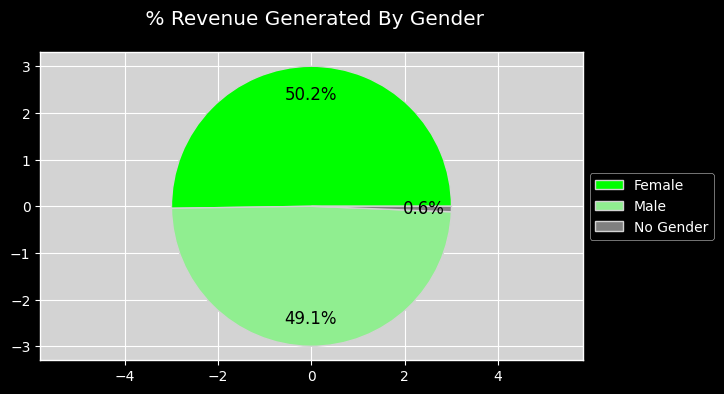

In [270]:
fig, ax= plt.subplots(figsize = (7,4))
ax.set_facecolor("lightgrey")
lg_name = ("Female", "Male", "No Gender")
ax.set_title(" % Revenue Generated By Gender", pad = 20, color = "white")
wedges, text, autotext = ax.pie(sort_reset_all_data_customer_gender["Revenue"], colors = ["lime", "lightgreen", "grey"], radius =3, 
       center = (0,0),  autopct="%.1f%%", pctdistance = 0.8, counterclock = True, textprops = {"fontsize": 12, "color" : "black"},
       wedgeprops = {"linewidth": 1, "edgecolor": "lightgrey"}, frame = True)
ax.legend(wedges, lg_name, loc="center left", bbox_to_anchor=(1, 0.5)) 
plt.axis("equal")
plt.show()


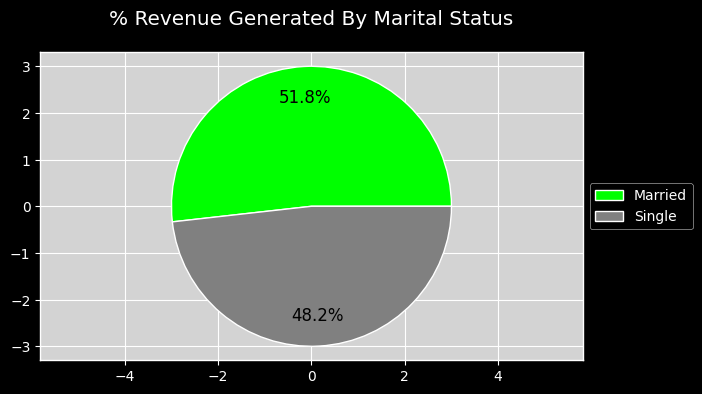

In [271]:
fig, ax= plt.subplots(figsize = (7,4))
ax.set_facecolor("lightgrey")
l_name = ("Married", "Single")
ax.set_title("% Revenue Generated By Marital Status", pad = 20, color = "white")
wedges, text, autotext = ax.pie(reset_all_data_customer_MS["Revenue"], colors = ["lime", "grey"], radius =3, 
       center = (0,0),  autopct="%.1f%%", pctdistance = 0.78, counterclock = True, textprops = {"fontsize": 12, "color" : "black"},
       wedgeprops = {"linewidth": 1, "edgecolor": "white"}, frame = True)
ax.legend(wedges, l_name, loc="center left", bbox_to_anchor=(1, 0.5))
plt.axis("equal")
plt.show()

Text(0.5, 1.0, 'Revenue Generated By Occupation (In Milions)')

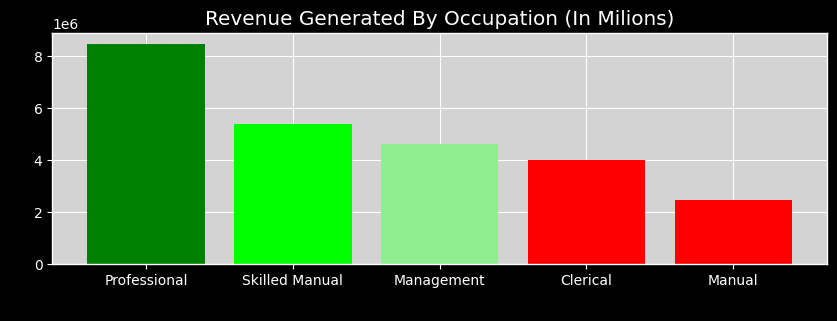

In [272]:
fig,ax = plt.subplots(figsize = (10,3))
ax.set_facecolor("lightgrey")
ax.bar(sort_reset_all_data_customer_occupation["Occupation"], sort_reset_all_data_customer_occupation["Revenue"], 
       data = sort_reset_all_data_customer_occupation, color = ["green", "lime", "lightgreen", "red", "red"])
plt.xlabel("Occupation", color = "black")
plt.ylabel("Revene", color = "black")
plt.title("Revenue Generated By Occupation (In Milions)", color = "white")

In [ ]:
px.treemap()

In [ ]:
# BY PRODUCT CATEGORIES AND SUB_CATEGORIES

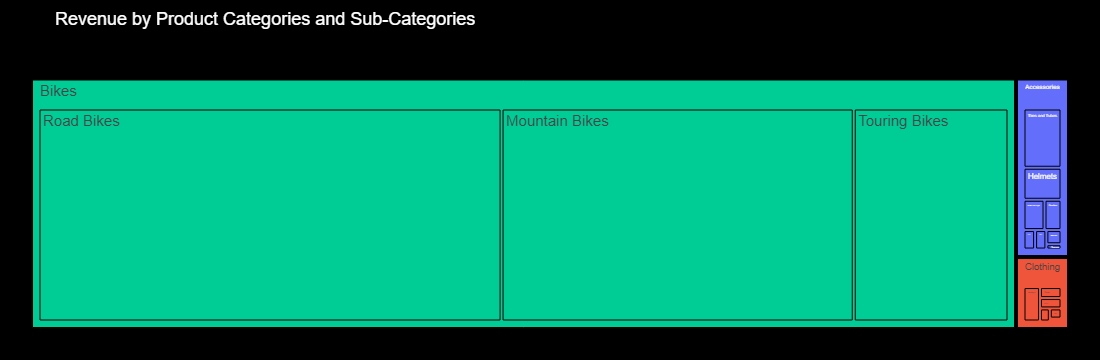

In [101]:
fig = px.treemap(data_frame = all_data, values = "Revenue", path = ["CategoryName", "SubcategoryName"], color = "CategoryName",
                  color_continuous_scale='Viridis', hover_name =  "SubcategoryName",  hover_data={"Revenue": True,"CategoryName": True, 
                                                                                                  "SubcategoryName": True},                                                                               
                  title="Revenue by Product Categories and Sub-Categories")
fig.update_traces(
    hovertemplate="<b>Category:</b> %{customdata[1]}<br>" +  
                  "<b>Subcategory:</b> %{label}<br>" +    
                  "<b>Revenue:</b> %{value}<br>"           
)
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),  
    title_font=dict(size=18, family='Arial', color='white'),  
    paper_bgcolor='black',
    font = dict(size = 15, family = 'Arial')
)
fig.show()

In [ ]:
# Time Analysis Plot

<Figure size 640x480 with 0 Axes>

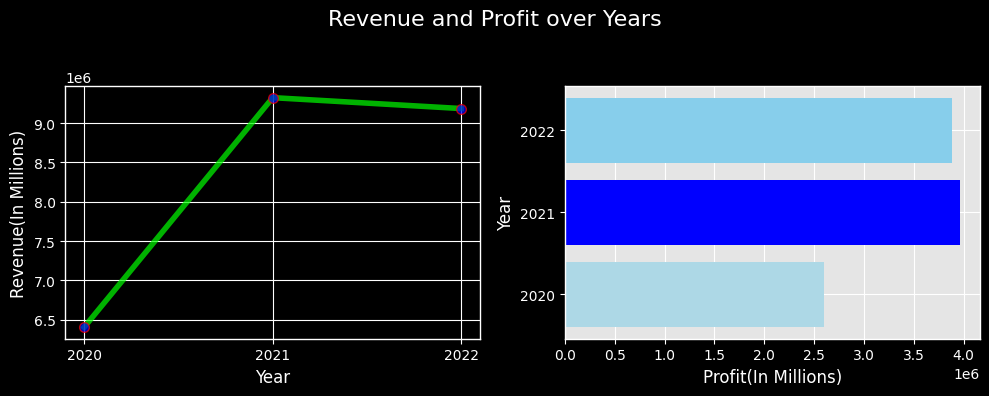

In [104]:
fig = plt.figure()
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
fig.suptitle("Revenue and Profit over Years", fontsize=16, color="white")
fig.patch.set_facecolor("black")
ax[0].plot(reset_all_data_time_year["Year"], reset_all_data_time_year["Revenue"], linewidth = 4, linestyle = "-",
        color = "lime", alpha = 0.7,marker = "o", markersize = 7, markeredgecolor = "red",
        markerfacecolor = "blue")
ax[0].set_xlabel("Year", color = "White")
ax[0].set_ylabel("Revenue(In Millions)", color = "white")
ax[0].set_facecolor("black")

ax[1].barh(reset_all_data_time_year["Year"], reset_all_data_time_year["Profit"], color = ["lightblue", "blue",  "skyblue",])
ax[1].set_xlabel("Profit(In Millions)", color = "white")
ax[1].set_ylabel("Year", color = "White")
ax[0].set_facecolor("black")

for axis in ax:
    axis.tick_params(colors="white")  # Set tick color to white

# Display the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])

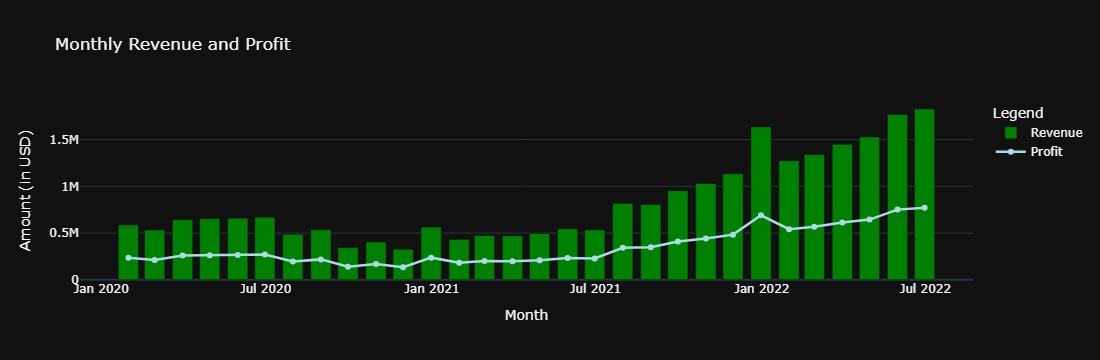

In [277]:
fig = go.Figure()
col1_name = "Revenue"
col2_name = "Profit"
trace1 = go.Bar(x = reset_all_data_overtime["date"], y = reset_all_data_overtime["Revenue"], name= col1_name, marker_color = "green")

trace2 = go.Scatter(x =  reset_all_data_overtime["date"], y = reset_all_data_overtime["Profit"],
                       name = col2_name, mode = "lines+markers", line = dict(color = "lightblue", width = 2.5))
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.update_layout(
    title="Monthly Revenue and Profit",
    xaxis_title="Month",
    yaxis_title="Amount (in USD)",
    legend=dict(title="Legend"),
    barmode="group",  
    template="plotly_dark"
)
fig.show()

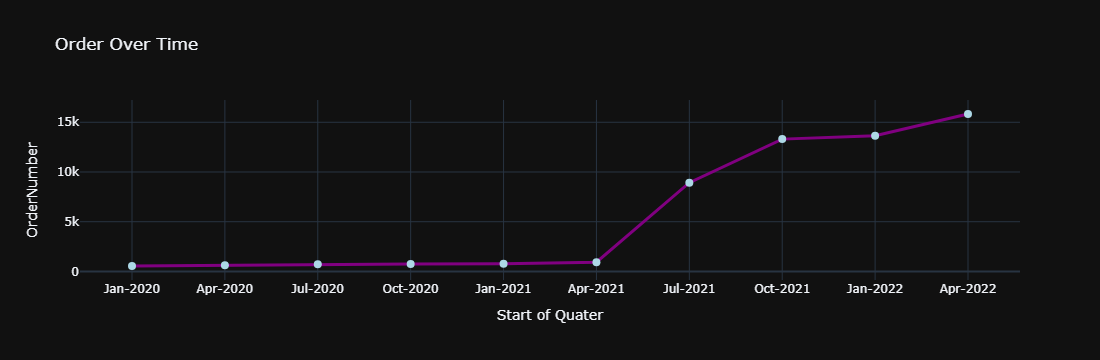

In [169]:
fig = px.line(data_frame = reset_all_data_orders, x = reset_all_data_orders["Start of Quater"], y = reset_all_data_orders["OrderNumber"],
                   title = "Order Over Time", template = "plotly_dark", markers = True)
fig.update_traces(line=dict(width=3, color = "purple"))  
fig.update_traces(marker=dict(size=8, color = "lightblue")) 
fig.show()

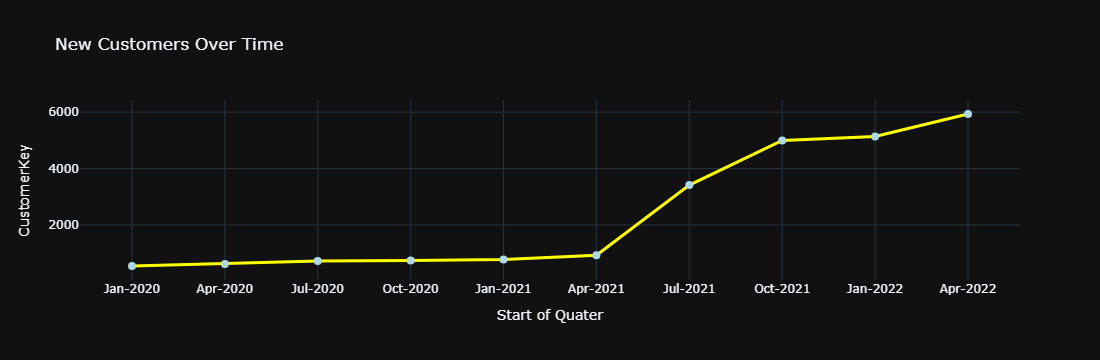

In [123]:
fig = px.line(data_frame = reset_all_data_customer, x = reset_all_data_customer["Start of Quater"], y = reset_all_data_customer["CustomerKey"],
             title = "New Customers Over Time", template = "plotly_dark", markers = True)
fig.update_traces(line = dict(width = 3, color = "yellow"))
fig.update_traces(marker = dict(size = 8, color = "lightblue"))

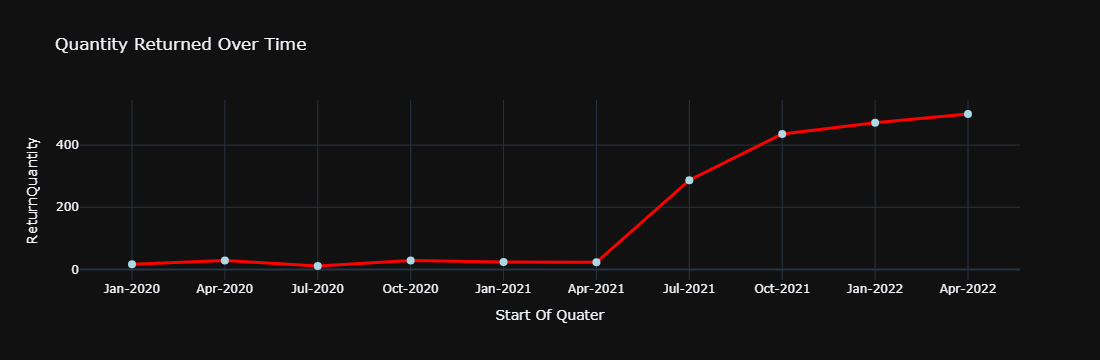

In [202]:
fig = px.line(data_frame = reset_returns_quantity, x = reset_returns_quantity["Start Of Quater"], y = reset_returns_quantity["ReturnQuantity"],
             title = "Quantity Returned Over Time", template = "plotly_dark", markers = True)
fig.update_traces(line = dict(width = 3, color = "red"))
fig.update_traces(marker = dict(size = 8, color = "lightblue"))

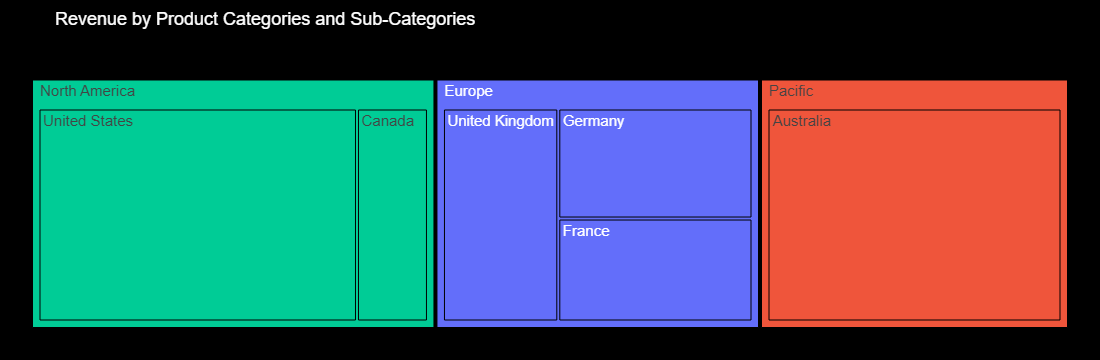

In [103]:
fig = px.treemap(data_frame = all_data, values = "Revenue", path = ["Continent", "Country"], color = "Continent",
                  color_continuous_scale='Viridis', hover_name = "Country",  hover_data={'Revenue': True, "Continent": True, "Country": True}, 
                  title="Revenue by Product Categories and Sub-Categories")
fig.update_traces(
   hovertemplate="<b>Continent:</b> %{customdata[1]}<br>" +  
                  "<b>Country:</b> %{label}<br>" +    
                  "<b>Revenue:</b> %{value}<br>"  
)

fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),  
    title_font=dict(size=18, family='Arial', color='white'),  
    paper_bgcolor='black',
    font = dict(size = 15, family = 'Arial')
)
fig.show()

In [ ]:
# Data Correlation

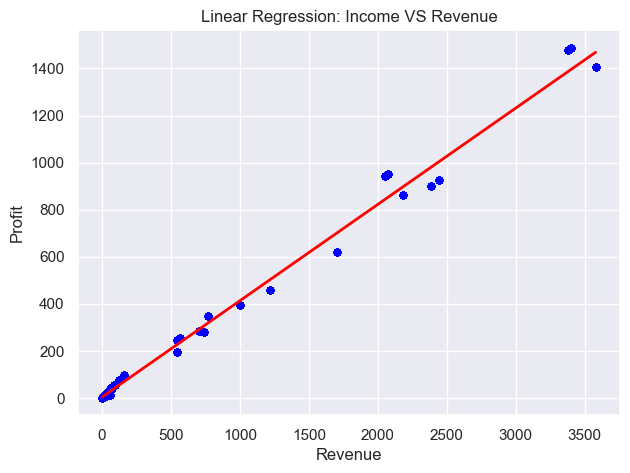

In [133]:
plt.figure(figsize = (7,5))
sns.regplot(data = all_data, x ="Revenue", y =  "Profit", scatter = True, color = "blue", scatter_kws = {"s":20, "alpha": 1.0},
           line_kws = {"color": "red", "lw":2}, ci = 95)
plt.title("Linear Regression: Income VS Revenue")
plt.xlabel("Revenue")
plt.ylabel("Profit")
plt.show()

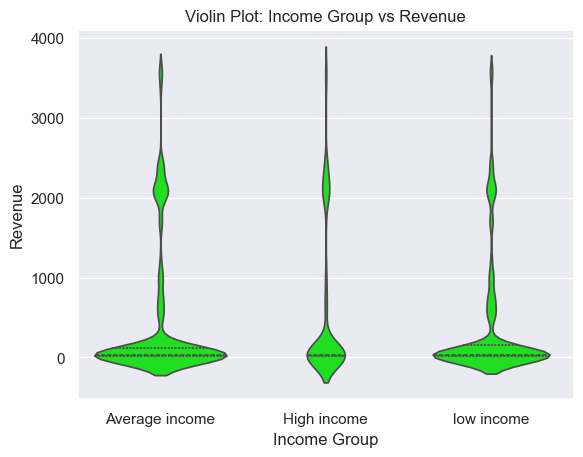

In [134]:
sns.violinplot(x='IncomeGroup', y='Revenue', data=all_data, density_norm = "count", color = "lime", inner = "quartile")
plt.title('Violin Plot: Income Group vs Revenue')
plt.xlabel('Income Group')
plt.ylabel('Revenue')
plt.show()
